Przykład implementacji prostego autoenkodera w PyTorch. Autoenkoder składa się z dwóch głównych części: enkodera (encoder), który kompresuje dane wejściowe do mniejszej reprezentacji, oraz dekodera (decoder), który próbuje odtworzyć oryginalne dane wejściowe na podstawie tej reprezentacji.

W tym przykładzie implementujemy autoenkoder dla danych w postaci obrazów (np. z zestawu MNIST):

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [4]:
# Definicja modelu autoenkodera
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Enkoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), #28*28=784
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        
        # Dekoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()  # Sigmoid dla wartości w zakresie [0, 1]
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [8]:
# Przygotowanie danych
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten wejście (28x28 -> 784)
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [11]:
# Inicjalizacja modelu, optymalizatora i funkcji straty
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
# Trening modelu
num_epochs = 10
for epoch in range(num_epochs):
    for data, _ in train_loader:  # Ignorujemy etykiety
        # Przesyłanie danych na urządzenie
        inputs = data
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0296
Epoch [2/10], Loss: 0.0232
Epoch [3/10], Loss: 0.0141
Epoch [4/10], Loss: 0.0137
Epoch [5/10], Loss: 0.0148
Epoch [6/10], Loss: 0.0157
Epoch [7/10], Loss: 0.0134
Epoch [8/10], Loss: 0.0120
Epoch [9/10], Loss: 0.0140
Epoch [10/10], Loss: 0.0105


In [15]:
# Zapisanie modelu
torch.save(model.state_dict(), 'autoencoder.pth')

In [17]:
# Testowanie modelu
test_data, _ = next(iter(train_loader))
test_output = model(test_data)

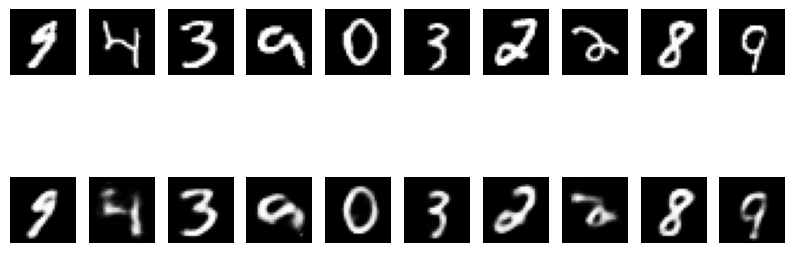

In [19]:
# Wizualizacja wyników
import matplotlib.pyplot as plt

# Rysowanie oryginalnych obrazów i zrekonstruowanych
n = 10  # Liczba obrazów do wyświetlenia
plt.figure(figsize=(10, 4))
for i in range(n):
    # Oryginał
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].view(28, 28).detach().numpy(), cmap='gray')
    plt.axis('off')
    
    # Rekonstrukcja
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_output[i].view(28, 28).detach().numpy(), cmap='gray')
    plt.axis('off')

plt.show()